In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("amz_dataset.csv")

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.shape

(2443651, 9)

In [6]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [7]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [10]:
# PART 1
# Generate a frequency table for the product category
frequency_table = df["category"].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [11]:
# Which are the top 5 most listed product categories?
top_5_categories = frequency_table.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [12]:
top_10_categories = frequency_table.head(10)
top_10_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

C:\Users\crist\AppData\Local\Temp\ipykernel_15660\1846763275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette="Set2")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Skin Care'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Hair Care'),
  Text(9, 0, 'Fragrances')])

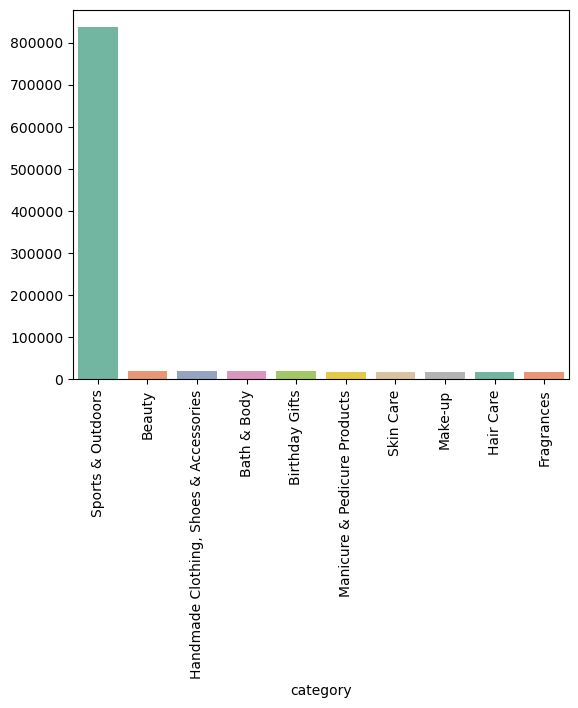

In [13]:
# Display the distribution of products across different categories using a bar chart

sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette="Set2")
plt.xticks(rotation=90) 

<Axes: ylabel='count'>

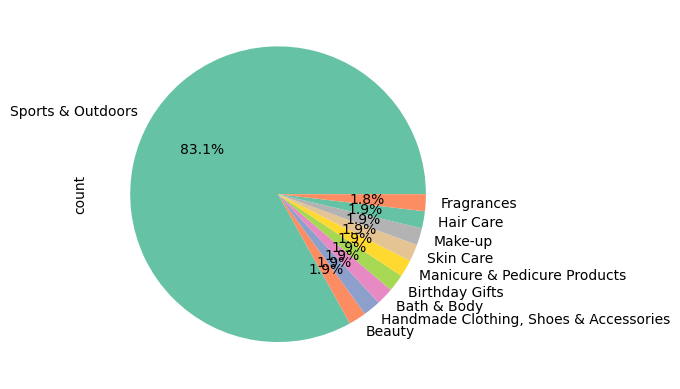

In [14]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

top_10_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"))

In [ ]:
# PART 2
# Calculate the mean, median, and mode for the price of products
print("Mean: ", df["price"].mean())
print("Median: ", df["price"].median())
print("Mode: ", df["price"].mode())


Mean:  89.24380943923663
Medain:  19.09
Mode:  0    9.99
Name: price, dtype: float64


In [16]:
# What's the average price point of products listed? How does this compare with the most common price point(mode)?

## The average price point is 89.24, which is higher than the most common price point

In [17]:
# Determine the variance, standard deviation, range, and interquartile range for product price.

print("Variance: ", df["price"].var())
print("Standard deviation: ", df["price"].std())
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
print("Range: ", range_price)
print("Interquartile range: ", df["price"].quantile([0.25, 0.5, 0.75]))


Variance:  119445.48532256528
Standard deviation:  345.60886175352226
Range:  100000.0
Interquartile range:  0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64


In [18]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?
## The data indicates that while a core portion of products is priced relatively closely together, there are extreme values outside this range

(0.0, 10000.0)

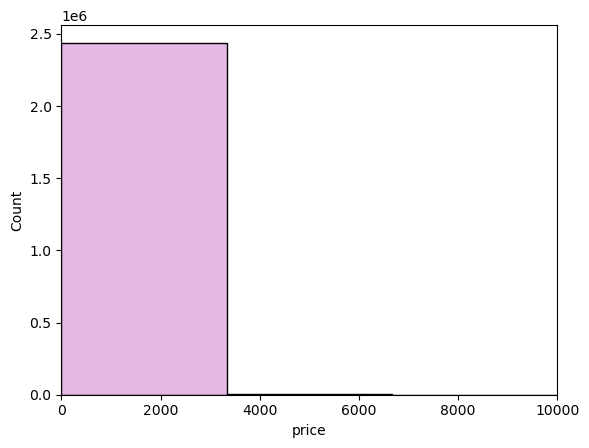

In [26]:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved..

sns.histplot(df['price'], bins= 30, color="plum")
plt.xlim(0, 10000)

(0.0, 200.0)

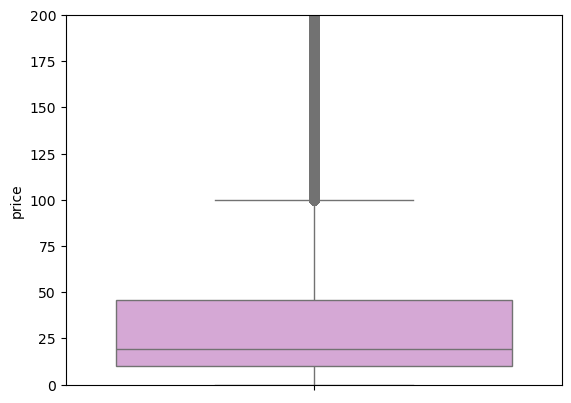

In [33]:
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing
sns.boxplot(data = df['price'], color="plum")
plt.ylim(0, 200) 

In [35]:
# PART 3
# Calculate the mean, median, and mode for the rating of products
print("Mean: ", df["stars"].mean())
print("Median: ", df["stars"].median())
print("Mode: ", df["stars"].mode())

Mean:  2.152836472966065
Median:  0.0
Mode:  0    0.0
Name: stars, dtype: float64


In [ ]:
# How do customers generally rate products? Is there a common trend?
## Customers generally rate products with 0 stars

In [36]:
# Determine the variance, standard deviation, and interquartile range for product rating.
# Are the ratings consistent, or is there a wide variation in customer feedback?

print("Variance: ", df["stars"].var())
print("Standard deviation: ", df["stars"].std())
min_price = df['stars'].min()
max_price = df['stars'].max()
range_price = max_price - min_price
print("Range: ", range_price)
print("Interquartile range: ", df["stars"].quantile([0.25, 0.5, 0.75]))


Variance:  4.81743402976196
Standard deviation:  2.1948653785054697
Range:  5.0
Interquartile range:  0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [38]:
# Calculate the skewness and kurtosis for the rating column.
# Are the ratings normally distributed, or do they lean towards higher or lower values?

skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()
skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

<Axes: xlabel='stars', ylabel='Count'>

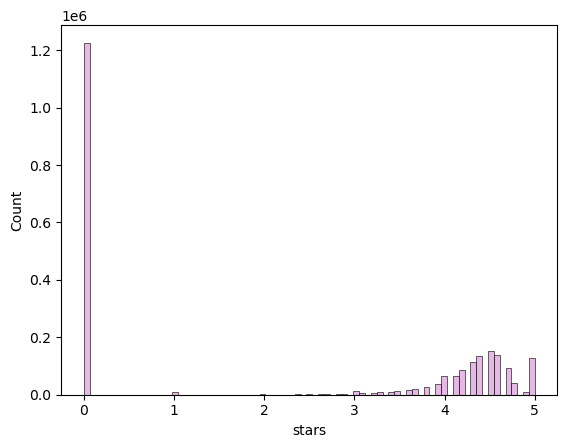

In [40]:
# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

sns.histplot(df["stars"], color="plum")